In [2]:
import matplotlib.pyplot as plt
from openpyxl import load_workbook
from openpyxl.utils import get_column_letter

workbook = load_workbook(filename="injector_lattice_20230303-2.xlsx", data_only=True)
worksheet = workbook["lattice"]

In [3]:
cell_value = worksheet["A1"].value
print(cell_value)

regend :


In [4]:
row_start = 12

res = {}
key_names = list(map(lambda c: c.value, worksheet["12"]))

for i, key in enumerate(key_names):
    res[key] = list(map(lambda c: c.value, worksheet[get_column_letter(i + 1)]))[row_start:]


#res = np.array(list(map(lambda c: c.value, sheet["H"])), dtype='str')[row_start:]

In [5]:
res.keys()

dict_keys(['beam_source', 'segment_name', 'inst_type', 'd/s', None, 'point_name', 'element_name', 'element_type', 's [m]', 'xd [mm]', 'yd [mm]', 'zd [mm]', 'xs [mm]', 'ys [mm]', 'zs [mm]', "zs' [mm]", 'Δx [mm]', 'Δy [mm]', 'Δz [mm]', "Δz' [mm]", "x' [rad]", "y' [rad]", "z' [rad]", 'drift [mm]', 'element_length [mm]', 'center-to-center_length [mm]', 'effective_length [m]', 'bore_dia [mm]', 'aperture [mm]', 'Remarks'])

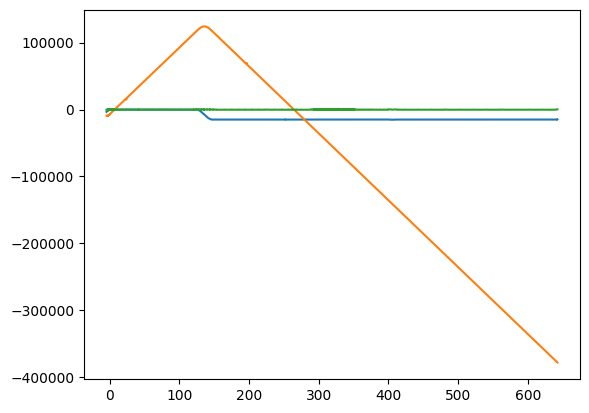

In [6]:
# reference (design) lattice
plt.plot(res['s [m]'], res['xd [mm]'])
plt.plot(res['s [m]'], res['yd [mm]'])
plt.plot(res['s [m]'], res['zd [mm]'])
plt.show()


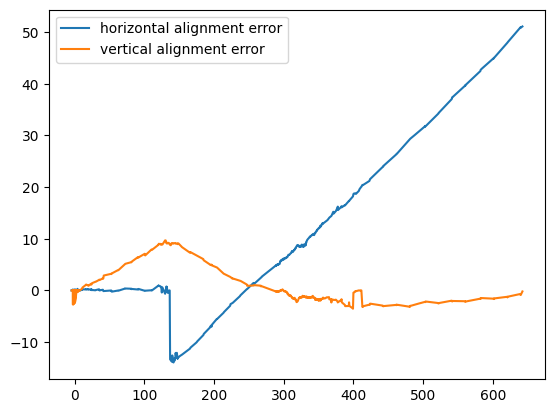

In [7]:
plt.plot(res['s [m]'], res['Δx [mm]'], label="horizontal alignment error")
plt.plot(res['s [m]'], res['Δz [mm]'], label="vertical alignment error")
plt.legend()

#plt.plot(res['s [m]'], res['Δy [mm]'])

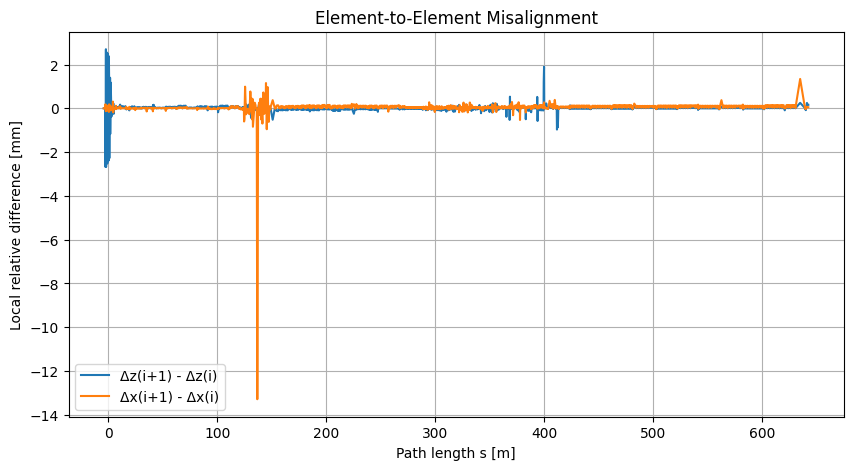

In [8]:
### ANDREA WAS HERE ######
import numpy as np
import matplotlib.pyplot as plt

s = np.array(res["s [m]"], dtype=float)
dx = np.array(res["Δx [mm]"], dtype=float)
dz = np.array(res["Δz [mm]"], dtype=float)

# Fit and remove linear drift
p_x = np.polyfit(s, dx, 1)
p_z = np.polyfit(s, dz, 1)

dx_detrended = dx - np.polyval(p_x, s)
dz_detrended = dz - np.polyval(p_z, s)

dx_local = np.diff(dx)
dz_local = np.diff(dz)
s_mid = (s[:-1] + s[1:]) / 2

plt.figure(figsize=(10,5))
plt.plot(s_mid, dz_local, label="Δz(i+1) - Δz(i)")
plt.plot(s_mid, dx_local, label="Δx(i+1) - Δx(i)")

plt.xlabel("Path length s [m]")
plt.ylabel("Local relative difference [mm]")
plt.title("Element-to-Element Misalignment")
plt.legend()
plt.grid(True)
plt.show()


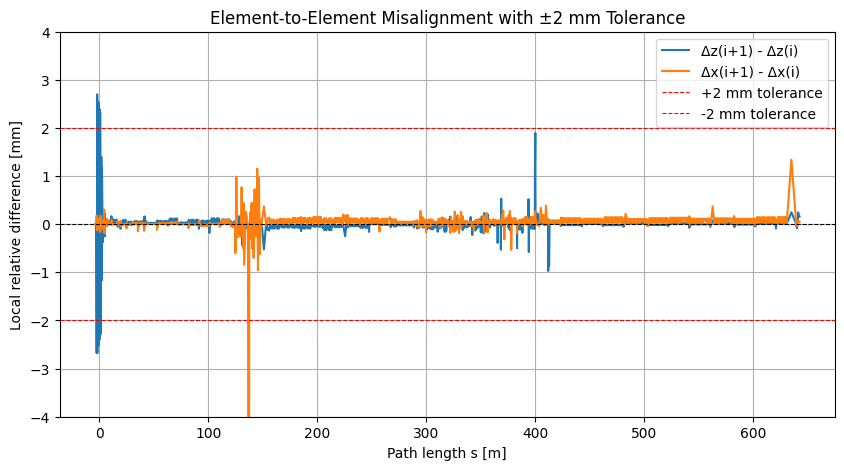

In [9]:
plt.figure(figsize=(10,5))
plt.plot(s_mid, dz_local, label="Δz(i+1) - Δz(i)")
plt.plot(s_mid, dx_local, label="Δx(i+1) - Δx(i)")

plt.axhline(0, color="k", linestyle="--", linewidth=0.8)
plt.axhline(2, color="r", linestyle="--", linewidth=0.8, label="+2 mm tolerance")
plt.axhline(-2, color="r", linestyle="--", linewidth=0.8, label="-2 mm tolerance")
plt.xlabel("Path length s [m]")
plt.ylabel("Local relative difference [mm]")
plt.title("Element-to-Element Misalignment with ±2 mm Tolerance")
plt.legend()
plt.grid(True)

plt.ylim(-4,4)
plt.show()



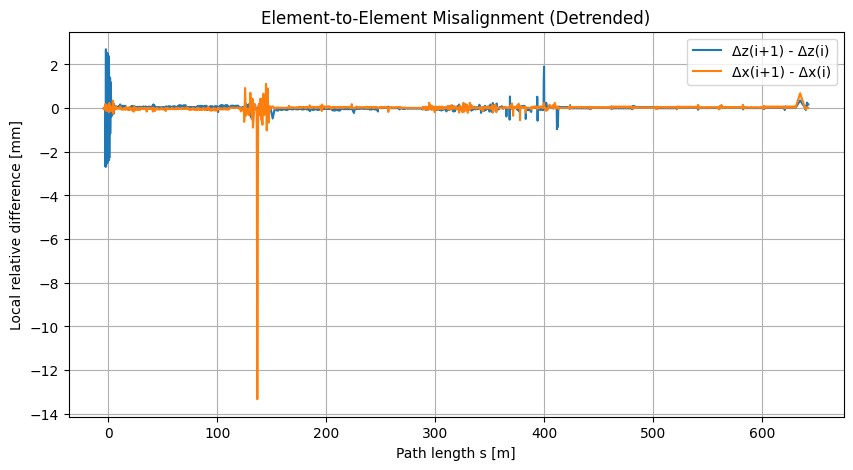

In [10]:
s = np.array(res["s [m]"], dtype=float)
dx = np.array(res["Δx [mm]"], dtype=float)
dz = np.array(res["Δz [mm]"], dtype=float)

# --- Fit and remove linear drift ---
p_x = np.polyfit(s, dx, 1)
p_z = np.polyfit(s, dz, 1)

dx_detrended = dx - np.polyval(p_x, s)
dz_detrended = dz - np.polyval(p_z, s)

# --- Compute local differences after detrending ---
dx_local = np.diff(dx_detrended)
dz_local = np.diff(dz_detrended)

# Midpoints for plotting
s_mid = (s[:-1] + s[1:]) / 2

plt.figure(figsize=(10,5))
plt.plot(s_mid, dz_local, label="Δz(i+1) - Δz(i)")
plt.plot(s_mid, dx_local, label="Δx(i+1) - Δx(i)")

plt.xlabel("Path length s [m]")
plt.ylabel("Local relative difference [mm]")
plt.title("Element-to-Element Misalignment (Detrended)")
plt.legend()
plt.grid(True)
plt.show()
